# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [1]:
import numpy as np
import pandas as pd

## 2. Carga los datos

In [28]:
df = pd.read_csv('data/Euro_2012_stats_TEAM.csv')

pct_cols = ['Shooting Accuracy', '% Goals-to-shots', 'Passing Accuracy',
       'Saves-to-shots ratio']
df.loc[:, pct_cols] = df.loc[:, pct_cols].apply(lambda x: x.str.strip('%')).astype(float)/100

df.head()

C:\Users\alber\AppData\Local\Temp\ipykernel_14624\2510271934.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, pct_cols] = df.loc[:, pct_cols].apply(lambda x: x.str.strip('%')).astype(float)/100


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,0.519,0.160,32,0,0,0,...,13,0.813,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,0.419,0.129,39,0,0,0,...,9,0.601,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,0.500,0.200,27,1,0,0,...,10,0.667,25,38,8,4,0,7,7,15
3,England,5,11,18,0.500,0.172,40,0,0,0,...,22,0.881,43,45,6,5,0,11,11,16
4,France,3,22,24,0.379,0.065,65,1,0,0,...,6,0.546,36,51,5,6,0,11,11,19


In [27]:
df.dtypes

Team                           object
Goals                           int64
Shots on target                 int64
Shots off target                int64
Shooting Accuracy             float64
% Goals-to-shots              float64
Total shots (inc. Blocked)      int64
Hit Woodwork                    int64
Penalty goals                   int64
Penalties not scored            int64
Headed goals                    int64
Passes                          int64
Passes completed                int64
Passing Accuracy              float64
Touches                         int64
Crosses                         int64
Dribbles                        int64
Corners Taken                   int64
Tackles                         int64
Clearances                      int64
Interceptions                   int64
Clearances off line           float64
Clean Sheets                    int64
Blocks                          int64
Goals conceded                  int64
Saves made                      int64
Saves-to-sho

## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

C:\Users\alber\AppData\Local\Temp\ipykernel_14624\3744295839.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


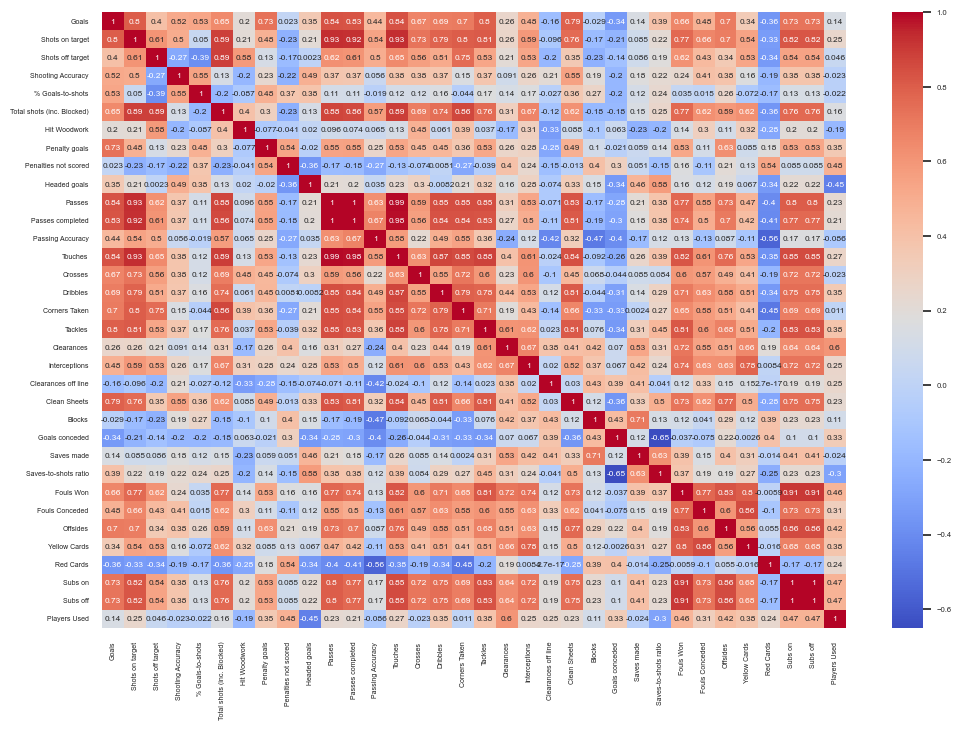

In [29]:
# Creamos un heatmap para ver la correlación entre las variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# hacemos las celdas mas grandes
sns.set(font_scale=.5)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# hacemos los ticks mas pequeños en ambos ejes
plt.yticks(fontsize=5)
plt.xticks(fontsize=5);


## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

<AxesSubplot: xlabel='Shooting Accuracy', ylabel='Goals'>

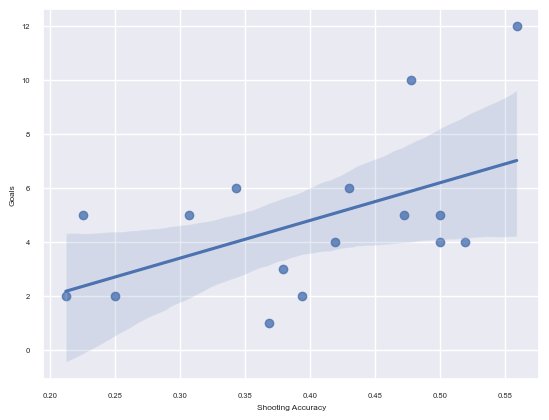

In [31]:
# df["Shooting Accuracy"]
sns.regplot(x="Shooting Accuracy", y="Goals", data=df)

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


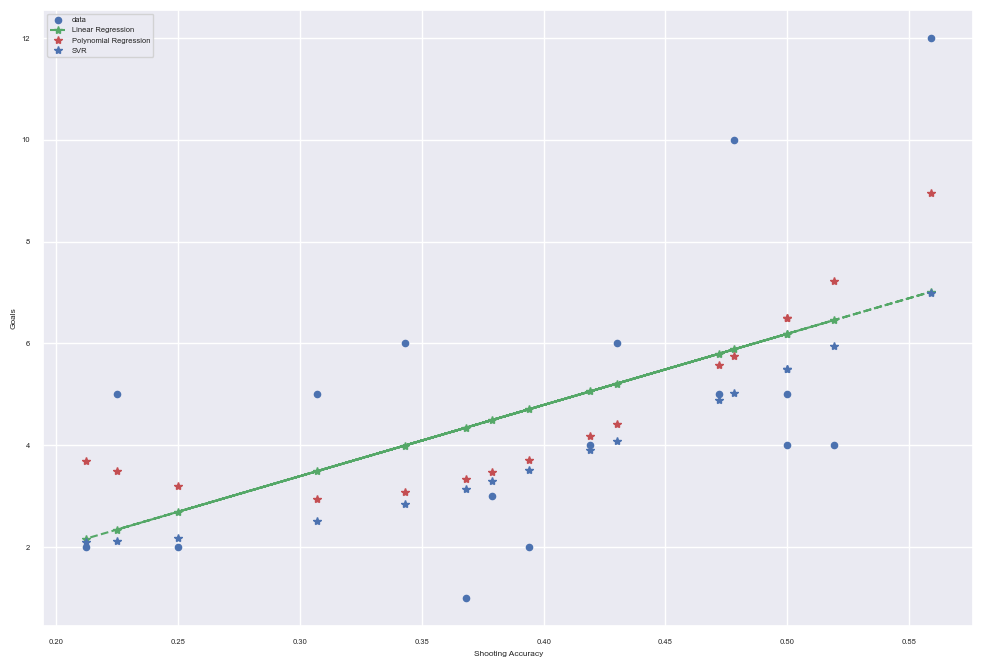

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

X = df["Shooting Accuracy"].values.reshape(-1,1)
y = df["Goals"].values.reshape(-1,1)

# Creamos un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred_lm = model.predict(X)

# Creamos un modelo de regresión polinomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

# Creamos un modelo de regresión SVR
model_svr = SVR(kernel='poly', degree=2, coef0=1, C=100)
model_svr.fit(X, y)
y_pred_svr = model_svr.predict(X)

# Graficamos los resultados
plt.figure(figsize=(12,8))
plt.scatter(X, y, s=20, label='data')
# Para que sean puntos sin lineas cambio el linestyle a ''
# Para cambiar el color del marker a rojo cambio el color a red
plt.plot(X, y_pred_lm, "g*--", label='Linear Regression')
plt.plot(X, y_pred_poly, "r*", label='Polynomial Regression')
plt.plot(X, y_pred_svr, "b*", label='SVR')
plt.xlabel('Shooting Accuracy')
plt.ylabel('Goals')
plt.legend()
plt.show()

MAE Linear Regression:  2.009373339344225
MAE Polynomial Regression:  1.919365216277697
MAE SVR:  1.8012488908611743

R^2 Linear Regression:  0.2716593767213702
R^2 Polynomial Regression:  0.38480352654161964
R^2 SVR:  0.26938557694827203


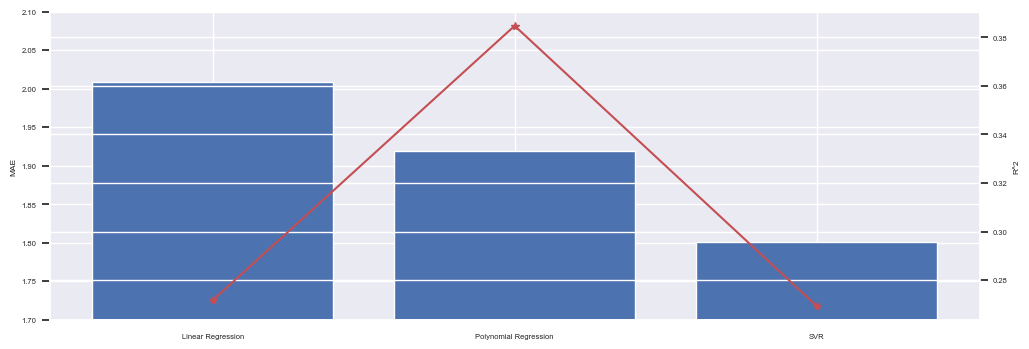

In [63]:
# Calculamos el MAE y el R^2 para cada modelo
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE Linear Regression: ", mean_absolute_error(y, y_pred_lm))
print("MAE Polynomial Regression: ", mean_absolute_error(y, y_pred_poly))
print("MAE SVR: ", mean_absolute_error(y, y_pred_svr))
print()
print("R^2 Linear Regression: ", r2_score(y, y_pred_lm))
print("R^2 Polynomial Regression: ", r2_score(y, y_pred_poly))
print("R^2 SVR: ", r2_score(y, y_pred_svr))

# Representamos los resultados en un diagrama de barras el MAE
# Añadimos en un segundo eje y el R^2
plt.figure(figsize=(12,4))
plt.bar(['Linear Regression', 'Polynomial Regression', 'SVR'], [mean_absolute_error(y, y_pred_lm), mean_absolute_error(y, y_pred_poly), mean_absolute_error(y, y_pred_svr)])
plt.ylabel('MAE')
plt.ylim(1.7, 2.1)
plt.twinx()
plt.plot(['Linear Regression', 'Polynomial Regression', 'SVR'], [r2_score(y, y_pred_lm), r2_score(y, y_pred_poly), r2_score(y, y_pred_svr)], 'r-*')
plt.ylabel('R^2')
plt.show()


## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [64]:
df.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [72]:
y.value_counts()

5     4
4     3
2     3
6     2
3     1
10    1
1     1
12    1
Name: Goals, dtype: int64

In [74]:
y.map(d_map_code)

0      5.0
1      5.0
2      5.0
3      6.0
4      4.0
5      NaN
6      6.0
7     10.0
8      3.0
9      3.0
10    10.0
11     2.0
12     6.0
13     NaN
14     6.0
15     3.0
Name: Goals, dtype: float64

In [90]:
d_map_code

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 10: 6, 12: 7}

In [110]:
np.argmax(model_svm.predict_proba(X), axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1], dtype=int64)

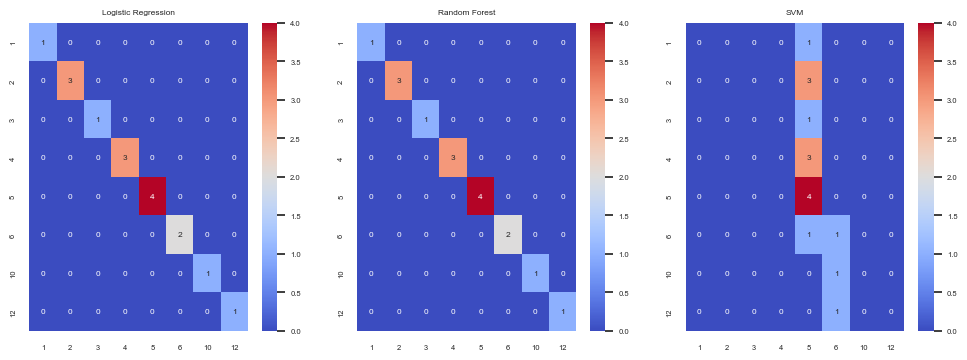

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X = df[['% Goals-to-shots', 'Total shots (inc. Blocked)', 'Corners Taken',  'Passes', 'Dribbles']]
y = df['Goals']

d_map_code = dict(zip(np.sort(y.unique()),  (range(y.nunique()))))
y_coded = y.map(d_map_code)

# Creamos un modelo de regresión logistica
model_log = LogisticRegression(max_iter=10000000, penalty="l2", C=1, solver="newton-cg")
model_log.fit(X, y_coded)
y_pred_log = model_log.predict(X)

# Creamos un modelo de clasificacion random forest
model_rf = RandomForestClassifier()
model_rf.fit(X, y_coded)
y_pred_rf = model_rf.predict(X)

# Creamos un modelo de clasificacion SVM
model_svm = SVC(decision_function_shape='ovo', probability=True)
model_svm.fit(X, y_coded)
y_pred_svm = model_svm.predict(X)

# Mostramos la matriz de confusión para cada modelo remapeando las etiquetas
from sklearn.metrics import confusion_matrix
# d_map_decode = {v: k for k, v in d_map_code.items

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_coded, y_pred_log), annot=True, cmap='coolwarm', fmt='d', xticklabels=d_map_code.keys(), yticklabels=d_map_code.keys())
plt.title('Logistic Regression')
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_coded, y_pred_rf), annot=True, cmap='coolwarm', fmt='d', xticklabels=d_map_code.keys(), yticklabels=d_map_code.keys())
plt.title('Random Forest')
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_coded, y_pred_svm), annot=True, cmap='coolwarm', fmt='d', xticklabels=d_map_code.keys(), yticklabels=d_map_code.keys())
plt.title('SVM')

# Aumentamos el tamaño del fontsize
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)
plt.show()


In [97]:
y_pred_svm

array([4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4], dtype=int64)

In [98]:
d_map_code

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 10: 6, 12: 7}